In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [3]:
from statsmodels.tsa.stattools import adfuller

import pmdarima

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv(r'sales_data_add_wes - Python.csv')
df=df.set_index("Date")


In [7]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)


In [8]:
adfuller(train_df)

(-0.9424157703469255,
 0.773683697257435,
 9,
 20,
 {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125},
 61.304289478514875)

pmdarima.arima.nsdiffs(train_df['Sales'],m=4)

In [9]:
model = ExponentialSmoothing(train_df,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_trend=0.11,smoothing_level=0.2,smoothing_seasonal=0.3)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
model.summary()

Dep. Variable:,Sales,No. Observations:,30
Model:,ExponentialSmoothing,SSE,32.266
Optimized:,True,AIC,18.185
Trend:,Additive,BIC,29.395
Seasonal:,Additive,AICC,29.764
Seasonal Periods:,4,Date:,"Tue, 19 Sep 2023"
Box-Cox:,False,Time:,22:22:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.1100000,beta,False


In [11]:
model = ExponentialSmoothing(train_df,trend='add',seasonal='add',seasonal_periods=4).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,30
Model:,ExponentialSmoothing,SSE,22.188
Optimized:,True,AIC,6.950
Trend:,Additive,BIC,18.160
Seasonal:,Additive,AICC,18.529
Seasonal Periods:,4,Date:,"Tue, 19 Sep 2023"
Box-Cox:,False,Time:,22:22:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,2.9384e-09,beta,True


In [12]:
fitted_values=model.fittedvalues
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)

In [13]:
forecast_validation = model.forecast(10)
forecast_validation_df=pd.DataFrame(forecast_validation)
forecast_validation_df
forecast_validation_df.rename(columns = {0:'Forecast'}, inplace = True)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_validation_df])

In [15]:
df_graph=df.reset_index(drop=True)

In [16]:
final_df=pd.concat([fitted_forecast_df,df_graph],axis=1)

In [17]:
date_range = pd.date_range(start='1984-01-01', end='1993-10-01',freq='QS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)

In [18]:
final_df=pd.concat([final_df,date_range_df],axis=1)

In [19]:
final_df=final_df.set_index("Date")
final_df


,Fitted_Values,Forecast,Sales
Date,,,
1984-01-01,20.312498,NaN,20
1984-04-01,10.687500,NaN,12
1984-07-01,10.196432,NaN,10
1984-10-01,19.339283,NaN,18
1985-01-01,23.580355,NaN,23
1985-04-01,13.955357,NaN,14
1985-07-01,13.464289,NaN,13
1985-10-01,22.607140,NaN,22
1986-01-01,26.848212,NaN,28


In [20]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(final_df["Sales"],final_df["Forecast"])

4.456647050766267

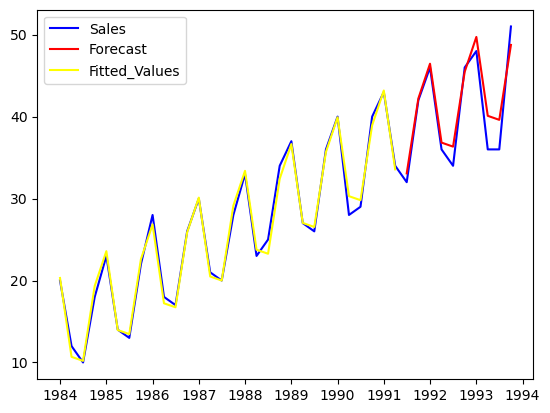

In [21]:
fig, ax = plt.subplots()
ax.plot(final_df["Sales"], label="Sales",color='blue')
ax.plot(final_df["Forecast"], label="Forecast",color='red')
ax.plot(final_df["Fitted_Values"], label="Fitted_Values",color='yellow')
ax.legend()

In [22]:
mp=model.params

In [23]:
mp=pd.DataFrame(mp)

In [24]:
mp

,smoothing_level,smoothing_trend,smoothing_seasonal,damping_trend,initial_level,initial_trend,initial_seasons,use_boxcox,lamda,remove_bias
0,1.490123e-08,2.938393e-09,3.802523e-13,NaN,13.301555,0.816964,6.193980,False,None,False
1,1.490123e-08,2.938393e-09,3.802523e-13,NaN,13.301555,0.816964,-4.247984,False,None,False
2,1.490123e-08,2.938393e-09,3.802523e-13,NaN,13.301555,0.816964,-5.556016,False,None,False
3,1.490123e-08,2.938393e-09,3.802523e-13,NaN,13.301555,0.816964,2.769872,False,None,False


In [25]:
final_model = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_trend=mp.iloc[0,1],smoothing_level=mp.iloc[0,0],smoothing_seasonal=mp.iloc[0,2])

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
forecast_future = final_model.forecast(8)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
df_graph=df.reset_index(drop=True)

In [28]:
final=pd.concat([df_graph,forecast_future])

In [29]:
final.rename(columns = {0:'Forecast'}, inplace = True)

<AxesSubplot:xlabel='Date'>

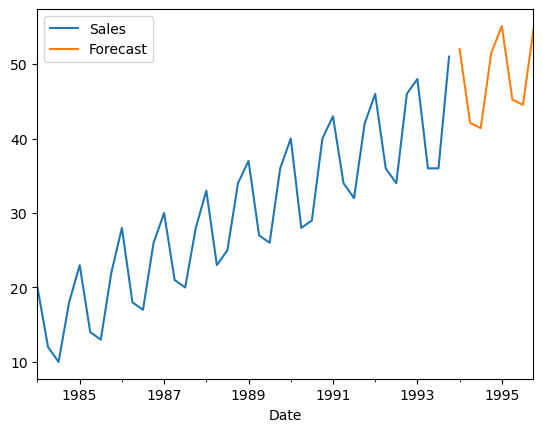

In [30]:
date_range = pd.date_range(start='1984-01-01', periods=48,freq='QS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)
date_range_df
final=pd.concat([final,date_range_df],axis=1)
final=final.set_index("Date")
final.plot()